In [1]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm

['C:\\Users\\imesc\\plant-pathology-2020-fgvc7', 'C:\\Users\\imesc\\anaconda3\\python38.zip', 'C:\\Users\\imesc\\anaconda3\\DLLs', 'C:\\Users\\imesc\\anaconda3\\lib', 'C:\\Users\\imesc\\anaconda3', '', 'C:\\Users\\imesc\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\Users\\imesc\\anaconda3\\lib\\site-packages', 'C:\\Users\\imesc\\anaconda3\\lib\\site-packages\\pyvolve-1.0.3-py3.8.egg', 'C:\\Users\\imesc\\anaconda3\\lib\\site-packages\\biopython-1.78-py3.8-win-amd64.egg', 'C:\\Users\\imesc\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\imesc\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\imesc\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\imesc\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\imesc\\.ipython']


In [ ]:
conda install -c anaconda natsort

In [9]:
!pip install pandas

In [8]:
DIR=r'C:\Users\imesc\plant-pathology-2020-fgvc7\images\Original Images'

In [9]:
train=pd.read_csv(r"C:\Users\imesc\plant-pathology-2020-fgvc7\labels\train.csv")
test=pd.read_csv(r"C:\Users\imesc\plant-pathology-2020-fgvc7\labels\test.csv")

In [6]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [10]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [11]:
#Prepare Training data

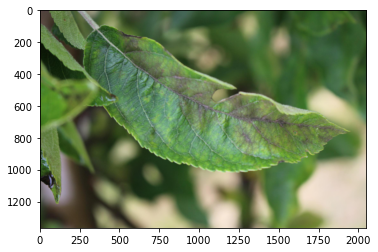

In [12]:
image1=Image.open(r'C:\Users\imesc\plant-pathology-2020-fgvc7\images\Original Images\Test_2.jpg')
plt.imshow(image1)
plt.show()

In [13]:
class_names=train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [14]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number = number + 1

In [15]:
train.head(10)

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0
5,Train_5,1,0,0,0,0
6,Train_6,0,1,0,0,1
7,Train_7,0,0,0,1,3
8,Train_8,0,0,0,1,3
9,Train_9,1,0,0,0,0


In [16]:
#natsort.natsorted(os.listdir(DIR))

In [17]:
# DIR

In [18]:
def get_label_img(img):
    if search("Train", img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [43]:
# img='Train_0.jpg'

In [44]:
# img.split('.')[0]

In [36]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path, r'C:\Users\imesc\plant-pathology-2020-fgvc7\images\train\healthy')
                
            elif (img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path, r'C:\Users\imesc\plant-pathology-2020-fgvc7\images\train\multiple_disease')
                
            elif (img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path, r'C:\Users\imesc\plant-pathology-2020-fgvc7\images\train\rust')
                
            elif (img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path, r'C:\Users\imesc\plant-pathology-2020-fgvc7\images\train\scab')
        
        elif search("Test",img):
                shutil.copy(path, r'C:\Users\imesc\plant-pathology-2020-fgvc7\images\test')
                
    

In [37]:
shutil.os.mkdir(r'C:\Users\imesc\plant-pathology-2020-fgvc7\images\train')
shutil.os.mkdir(r'C:\Users\imesc\plant-pathology-2020-fgvc7\images\train\healthy')
shutil.os.mkdir(r'C:\Users\imesc\plant-pathology-2020-fgvc7\images\train\multiple_disease')
shutil.os.mkdir(r'C:\Users\imesc\plant-pathology-2020-fgvc7\images\train\rust')
shutil.os.mkdir(r'C:\Users\imesc\plant-pathology-2020-fgvc7\images\train\scab')

shutil.os.mkdir(r'C:\Users\imesc\plant-pathology-2020-fgvc7\images\test')


In [38]:
new_train_dir=create_train_data()

100%|█████████████████████████████████████████████████████████████████████████████| 3642/3642 [00:05<00:00, 614.77it/s]


In [39]:
#Important Explanations

In [40]:
#img.split("_")[1].split(".")[0]

In [41]:
#img

In [42]:
#path=os.path.join(DIR,img)
#path

In [ ]:
Data Preprocessing

In [2]:
Train_DIR=r'C:\Users\imesc\plant-pathology-2020-fgvc7\images\train'
Categories=['healthy', 'multiple_disease', 'rust', 'scab']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2RGB)
        split.imshow(img_array)
        plt.show()

NameError: name 'cv2' is not defined

In [ ]:
IMG_SIZE=50
new_image=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)
plt.imshownew_image)

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
path

In [ ]:
ModelPreparation